In [266]:
import pandas as pd
import numpy as np

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')


In [268]:
data = pd.read_csv('titanic_train.csv')

In [269]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [271]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

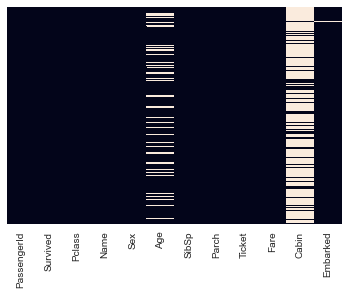

In [272]:
sns.heatmap(data.isnull(), yticklabels=False, cbar = False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

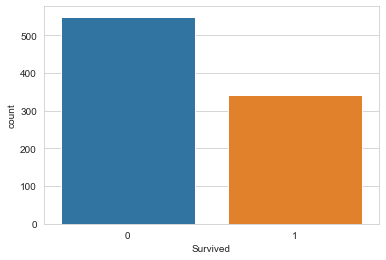

In [273]:
sns.countplot(x='Survived', data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

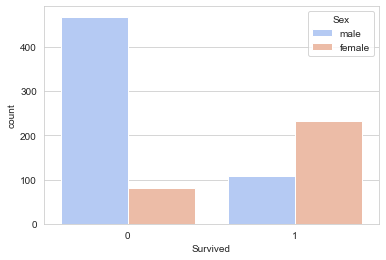

In [274]:
sns.countplot(x='Survived', hue='Sex', data=data,palette = 'coolwarm' )

<AxesSubplot:xlabel='Survived', ylabel='count'>

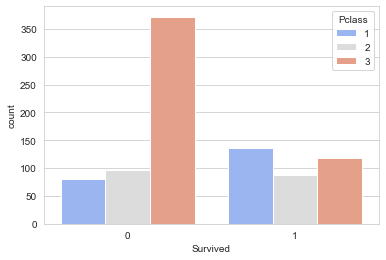

In [275]:
sns.countplot(x='Survived', data=data, hue='Pclass', palette='coolwarm')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

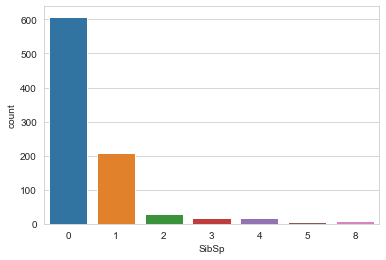

In [276]:
sns.countplot(x='SibSp', data=data)

<AxesSubplot:xlabel='Age', ylabel='Count'>

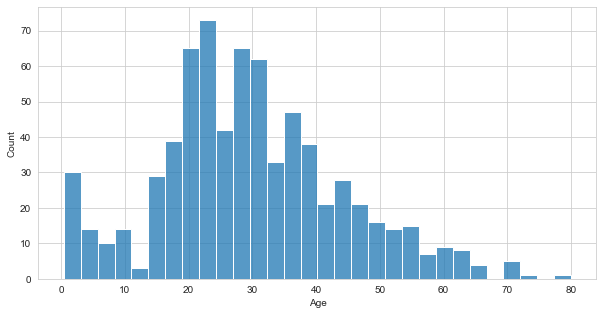

In [277]:
plt.figure(figsize = (10,5))
sns.histplot(x= data['Age'], kde = False, bins = 30)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

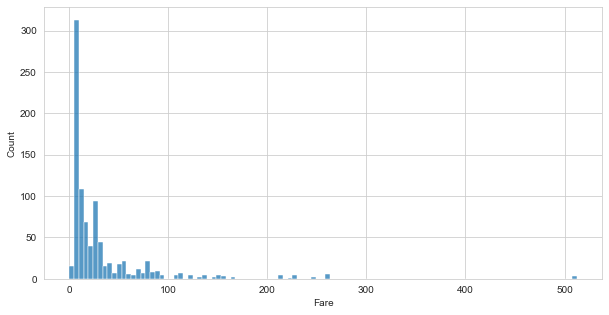

In [278]:
plt.figure(figsize = (10,5))
sns.histplot(data['Fare'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

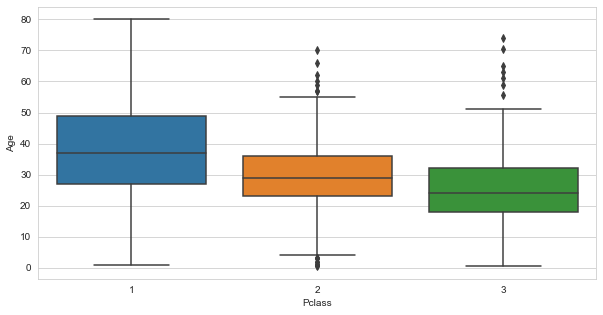

In [279]:
plt.figure(figsize = (10,5))
sns.boxplot(x='Pclass', y='Age', data=data)

In [280]:
gd = data.groupby('Pclass')['Age']

In [281]:
gd.get_group(1).mean()

38.233440860215055

In [282]:
gd.get_group(2).mean()

29.87763005780347

In [283]:
gd.get_group(3).mean()

25.14061971830986

In [284]:
def set_data(value):
    Age = value[0]
    Pclass = value[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age
    

In [285]:
data['Age'] = data[['Age','Pclass']].apply(set_data, axis=1)

<AxesSubplot:>

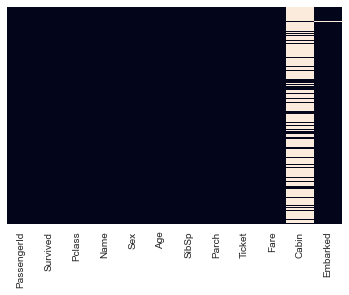

In [286]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False)

In [287]:
data.drop('Cabin',axis=1,inplace=True)

In [288]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [289]:
data.dropna(inplace=True)

<AxesSubplot:>

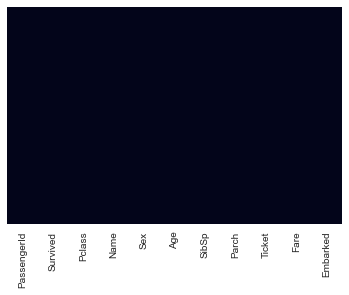

In [290]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [291]:
data.drop(['PassengerId','Ticket','Name'], axis=1, inplace=True)

In [292]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,25.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [294]:
sex = pd.get_dummies(data['Sex'],drop_first=True)

In [295]:
embarked = pd.get_dummies(data['Embarked'], drop_first=True)

In [296]:
data = pd.concat([data, sex,embarked], axis=1)

In [297]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [298]:
data.drop(['Embarked','Sex'], axis=1,inplace=True)

In [299]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [300]:
X = data.drop('Survived', axis=1)
y=data['Survived']

In [301]:
from sklearn.model_selection import train_test_split


In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [310]:
from sklearn.linear_model import LogisticRegression

In [311]:
logmodel = LogisticRegression()

In [312]:
logmodel.fit(X_train,y_train)

C:\Users\ashut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [313]:
predict = logmodel.predict(X_test)

In [314]:
from sklearn.metrics import classification_report

In [315]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

